In [3]:
##############
### Import ###
##############

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 25})

from scipy.optimize import curve_fit

import numpy as np
import astropy
from astropy.io import fits
from astropy.table import Table
from scipy.interpolate import InterpolatedUnivariateSpline
# import warnings
from tqdm import tqdm_notebook

from scipy.stats import binned_statistic

In [2]:
gaiaedr3 = fits.getdata('/Users/joshuapovick/Desktop/Research/gaia/GAIAEDR3allStar.fits.gz')

2.5log(Flux) -> 2.5/ln(10)*sigflux/flux

(-3.0, -0.3770445600152016)

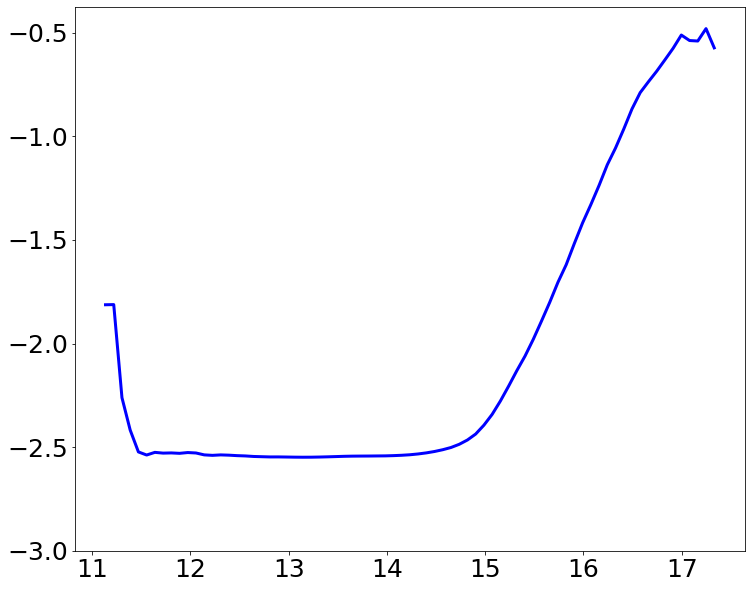

In [53]:
### BP
# bp_fin = np.where(np.isfinite(gaiaedr3['phot_bp_mean_mag'])==True)

bpmin = min(gaiaedr3['phot_bp_mean_mag'][gaia_ind])
bpmax = max(gaiaedr3['phot_bp_mean_mag'][gaia_ind])

bpdiff = bpmax-bpmin
bpfluxerr = (2.5*0.434)/gaiaedr3['phot_bp_mean_flux_over_error'][bp_fin]
bpmagerr = np.sqrt((bpfluxerr)**2+0.0027901700**2)

binnum = 75
bpbin ,_,_ = binned_statistic(gaiaedr3['phot_bp_mean_mag'][bp_fin],np.log10(bpmagerr),'median',bins=binnum)

plt.figure(figsize=[12,10])

plt.plot(np.arange(bpmin,bpmax,bpdiff/binnum),bpbin,lw=3.0,c='blue')
plt.ylim(bottom=-3.0)

(-3.0, -0.5569026350975037)

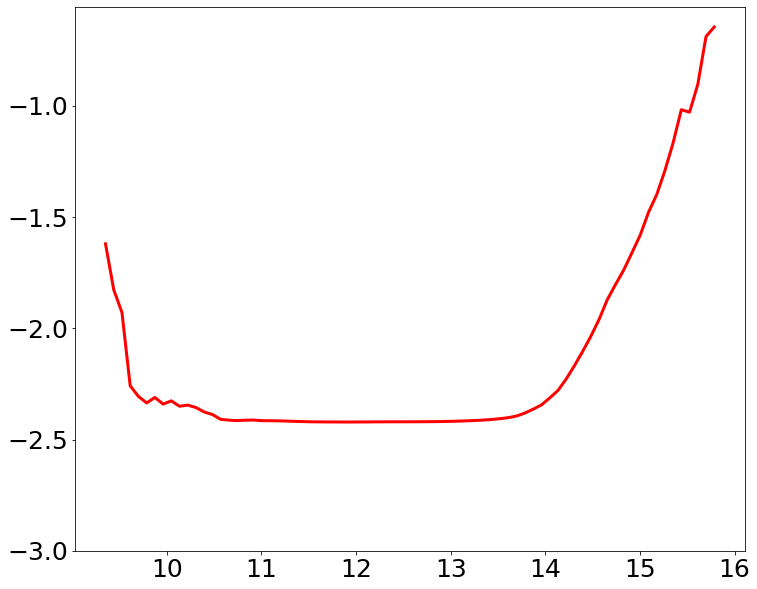

In [54]:
## RP
# rp_fin = np.where(np.isfinite(gaiaedr3['phot_rp_mean_mag'])==True)

rpmin = min(gaiaedr3['phot_rp_mean_mag'][gaia_ind])
rpmax = max(gaiaedr3['phot_rp_mean_mag'][gaia_ind])

rpdiff = rpmax-rpmin
rpfluxerr = (2.5*0.434)/gaiaedr3['phot_rp_mean_flux_over_error'][rp_fin]
rpmagerr = np.sqrt((rpfluxerr)**2+0.0037793818**2)

binnum = 75
rpbin ,_,_ = binned_statistic(gaiaedr3['phot_rp_mean_mag'][rp_fin],np.log10(rpmagerr),'median',bins=binnum)

plt.figure(figsize=[12,10])

plt.plot(np.arange(rpmin,rpmax,rpdiff/binnum),rpbin,lw=3.0,c='red')
plt.ylim(bottom=-3.0)

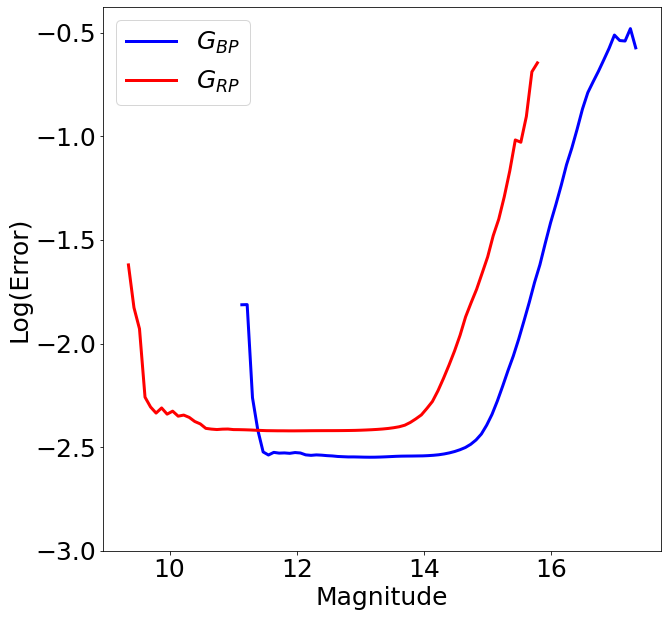

In [61]:
### Both
plt.figure(figsize=[10,10])
plt.plot(np.arange(bpmin,bpmax,bpdiff/binnum),bpbin,lw=3.0,c='blue',label=r'$G_{BP}$')
plt.plot(np.arange(rpmin,rpmax,rpdiff/binnum),rpbin,lw=3.0,c='red',label=r'$G_{RP}$')
plt.legend()
plt.ylim(bottom=-3.0)
plt.xlabel('Magnitude')
plt.ylabel('Log(Error)')
plt.savefig('gaiaerrs.pdf',bbox_inches='tight')

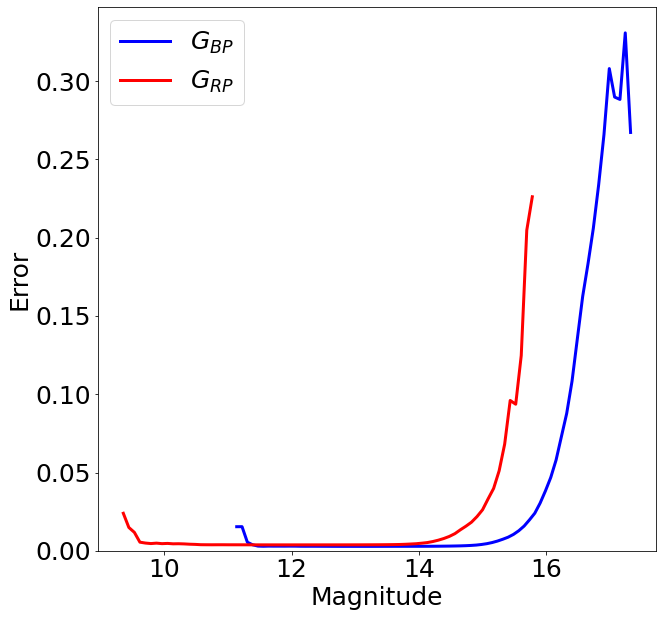

In [62]:
### Not Log
plt.figure(figsize=[10,10])
plt.plot(np.arange(bpmin,bpmax,bpdiff/binnum),10**bpbin,lw=3.0,c='blue',label=r'$G_{BP}$')
plt.plot(np.arange(rpmin,rpmax,rpdiff/binnum),10**rpbin,lw=3.0,c='red',label=r'$G_{RP}$')
plt.legend()
plt.ylim(bottom=.0)
plt.xlabel('Magnitude')
plt.ylabel('Error')
plt.savefig('gaiaerrsnotlog.pdf',bbox_inches='tight')

2.5log(Flux) -> 2.5*log10(1+phot_rp_mean_flux_err/phot_rp_mean_flux)

(0.0, 0.9619347289204597)

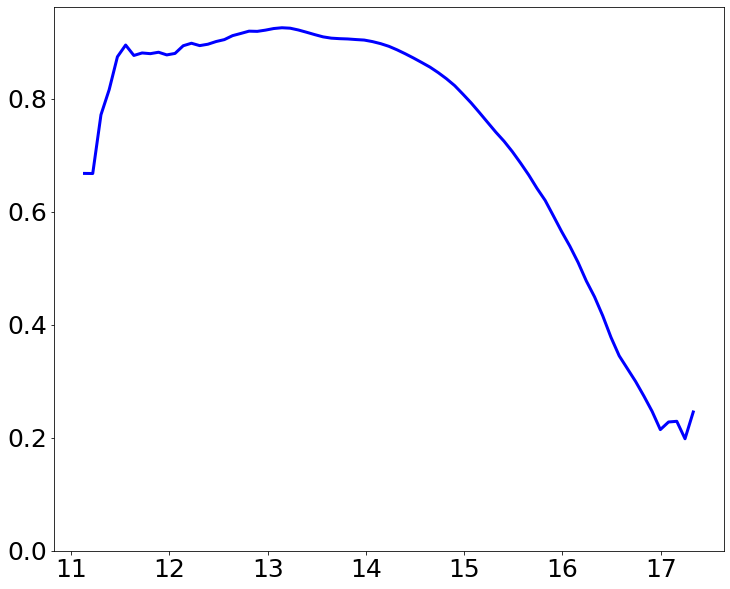

In [57]:
### BP
# bp_fin = np.where(np.isfinite(gaiaedr3['phot_bp_mean_mag'])==True)

bpmin = min(gaiaedr3['phot_bp_mean_mag'][gaia_ind])
bpmax = max(gaiaedr3['phot_bp_mean_mag'][gaia_ind])

bpdiff = bpmax-bpmin
bpfluxerr2 = 2.5*np.log10(1+gaiaedr3['phot_bp_mean_flux_over_error'][bp_fin])
bpmagerr2 = np.sqrt((bpfluxerr2)**2+0.0027901700**2)

binnum = 75
bpbin2 ,_,_ = binned_statistic(gaiaedr3['phot_bp_mean_mag'][bp_fin],np.log10(bpmagerr2),'median',bins=binnum)

plt.figure(figsize=[12,10])

plt.plot(np.arange(bpmin,bpmax,bpdiff/binnum),bpbin2,lw=3.0,c='blue')
plt.ylim(bottom=0.)

(0.0, 0.9831617161631584)

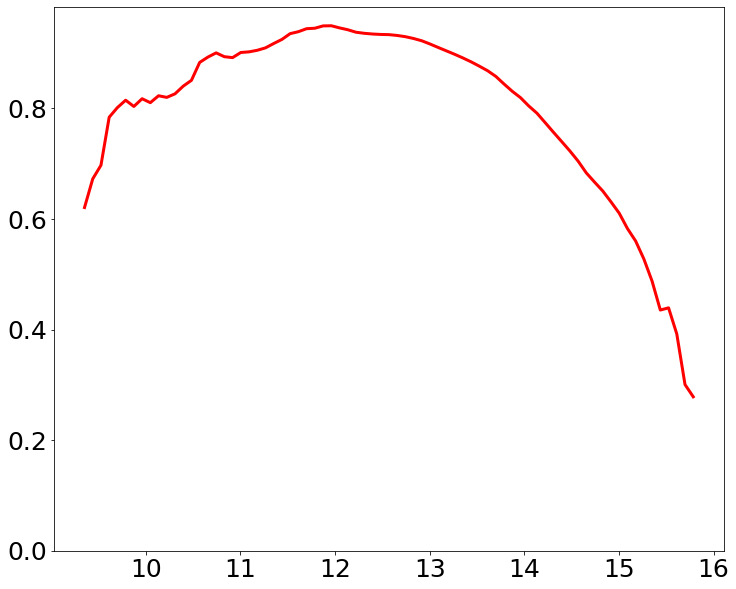

In [58]:
### RP
# rp_fin = np.where(np.isfinite(gaiaedr3['phot_rp_mean_mag'])==True)

rpmin = min(gaiaedr3['phot_rp_mean_mag'][gaia_ind])
rpmax = max(gaiaedr3['phot_rp_mean_mag'][gaia_ind])

rpdiff = rpmax-rpmin
rpfluxerr2 = 2.5*np.log10(1+gaiaedr3['phot_rp_mean_flux_over_error'][rp_fin])
rpmagerr2 = np.sqrt((rpfluxerr2)**2+0.0037793818**2)

binnum = 75
rpbin2 ,_,_ = binned_statistic(gaiaedr3['phot_rp_mean_mag'][rp_fin],np.log10(rpmagerr2),'median',bins=binnum)

plt.figure(figsize=[12,10])

plt.plot(np.arange(rpmin,rpmax,rpdiff/binnum),rpbin2,lw=3.0,c='red')
plt.ylim(bottom=0.)

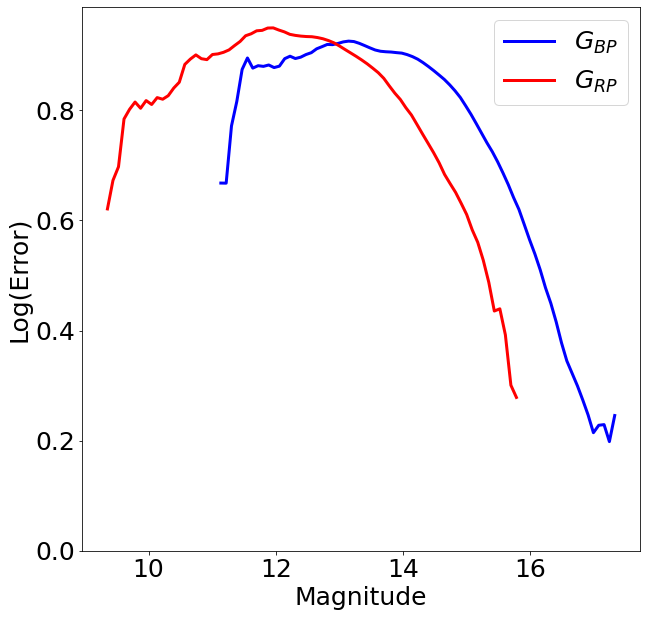

In [63]:
### Both
plt.figure(figsize=[10,10])
plt.plot(np.arange(bpmin,bpmax,bpdiff/binnum),bpbin2,lw=3.0,c='blue',label=r'$G_{BP}$')
plt.plot(np.arange(rpmin,rpmax,rpdiff/binnum),rpbin2,lw=3.0,c='red',label=r'$G_{RP}$')
plt.legend()
plt.ylim(bottom=0.)
plt.xlabel('Magnitude')
plt.ylabel('Log(Error)')
plt.savefig('gaiaerrs.pdf',bbox_inches='tight')

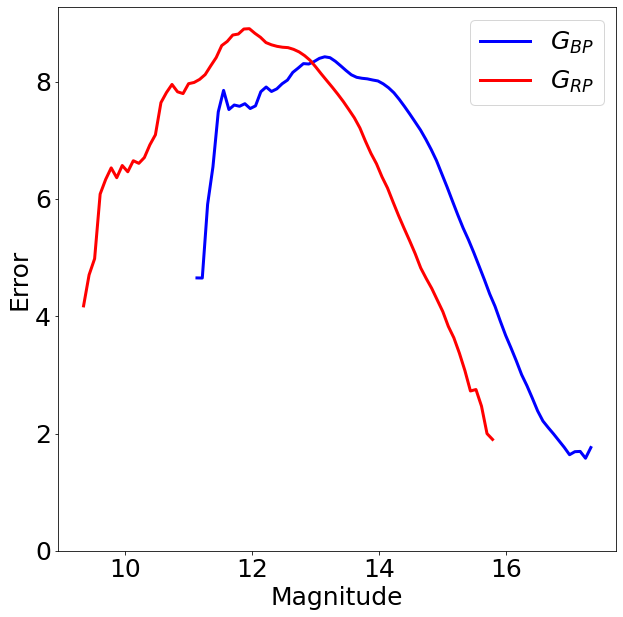

In [60]:
### Not Log
plt.figure(figsize=[10,10])
plt.plot(np.arange(bpmin,bpmax,bpdiff/binnum),10**bpbin2,lw=3.0,c='blue',label=r'$G_{BP}$')
plt.plot(np.arange(rpmin,rpmax,rpdiff/binnum),10**rpbin2,lw=3.0,c='red',label=r'$G_{RP}$')
plt.legend()
plt.ylim(bottom=.0)
plt.xlabel('Magnitude')
plt.ylabel('Error')
plt.savefig('gaiaerrs2notlog.pdf',bbox_inches='tight')

(array([0.0017167 , 0.00618012, 0.02140151, 0.0336473 , 0.0434897 ,
        0.04749533, 0.05241654, 0.06248786, 0.07553471, 0.09041284]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ],
       dtype=float32),
 <a list of 1 Patch objects>)

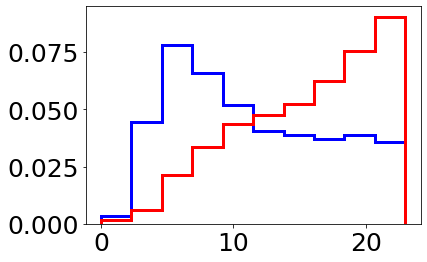

In [24]:
plt.hist(gaiaedr3['phot_bp_mean_flux_over_error'][bp_fin],color='blue',
         histtype='step',lw=3.0,density=True,range=(0,23))
plt.hist(gaiaedr3['phot_rp_mean_flux_over_error'][rp_fin],color='red',
         histtype='step',lw=3.0,density=True,range=(0,23))

In [25]:
### GCS Data
gcs = fits.getdata('/Users/joshuapovick/Desktop/Research/fits/allStar-r13-l33-58932beta_apa_dist_galvel_gc.fits.gz')
# cln = np.where((gcs['FE_H']>-9999.0)&(gcs['AK_TARG']>-9999.0)&(gcs['LOGG']>0.0)&
#                 (gcs['C_FE']>-9999.0)&(gcs['N_FE']>-9999.0))
# gcs = Table(gcs[cln])
gcs = Table(gcs[np.where((gcs['LOGG']>0.0)&(gcs['FE_H']>-9999.0)&(np.isfinite(gcs['FE_H'])==True))])

### Find Cluster with more than one star

idx = []
for i in range(len(np.unique(gcs['CLUSTER']))):
    idx.append(np.squeeze(np.where(gcs['CLUSTER']==np.unique(gcs['CLUSTER'])[i])))

for i in range(len(idx)):
    try:
        len(idx[i])
    except:
        print('bad: ',i)
        
good_names = []
for i in np.asarray(idx,dtype=object)[np.delete(np.asarray(list(range(len(idx)))),[28])]:
    if np.size(i)>10:
        good_names.append(gcs['CLUSTER'][i][0])

print(good_names)

# 
good_clus = np.where((gcs['CLUSTER']=='47Tuc')|(gcs['CLUSTER']=='M10')|(gcs['CLUSTER']=='M107')|
                     (gcs['CLUSTER']=='M12')|(gcs['CLUSTER']=='M13')|(gcs['CLUSTER']=='M15')|
                     (gcs['CLUSTER']=='M19')|(gcs['CLUSTER']=='M2')|(gcs['CLUSTER']=='M22')|
                     (gcs['CLUSTER']=='M3')|(gcs['CLUSTER']=='M4')|(gcs['CLUSTER']=='M5')|
                     (gcs['CLUSTER']=='M53')|(gcs['CLUSTER']=='M54')|(gcs['CLUSTER']=='M55')|
                     (gcs['CLUSTER']=='M68')|(gcs['CLUSTER']=='M71')|(gcs['CLUSTER']=='M79')|
                     (gcs['CLUSTER']=='M92')|(gcs['CLUSTER']=='NGC1851')|(gcs['CLUSTER']=='NGC2808')|
                     (gcs['CLUSTER']=='NGC288')|(gcs['CLUSTER']=='NGC3201')|(gcs['CLUSTER']=='NGC362')|
                     (gcs['CLUSTER']=='NGC5053')|(gcs['CLUSTER']=='NGC5466')|(gcs['CLUSTER']=='NGC6304')|
                     (gcs['CLUSTER']=='NGC6388')|(gcs['CLUSTER']=='NGC6752')|(gcs['CLUSTER']=='NGC6760'))

gcs = gcs[good_clus]

### DR17
dr17 = fits.getdata('/Users/joshuapovick/Desktop/Research/fits/allStarLite-dr17-synspec.fits.gz')
_, gcs_ind, dr17_ind = np.intersect1d(gcs['APOGEE_ID'], dr17['APOGEE_ID'], return_indices=True)

gcsdr17 = dr17[dr17_ind]
gcs = gcs[gcs_ind]

gcs_clus = np.unique(gcs['CLUSTER'])

bad:  28
['47Tuc', 'M10', 'M107', 'M12', 'M13', 'M15', 'M19', 'M2', 'M22', 'M3', 'M4', 'M5', 'M53', 'M54', 'M55', 'M68', 'M71', 'M79', 'M92', 'NGC1851', 'NGC2808', 'NGC288', 'NGC3201', 'NGC362', 'NGC5053', 'NGC5466', 'NGC6304', 'NGC6316', 'NGC6388', 'NGC6397', 'NGC6441', 'NGC6642', 'NGC6752', 'NGC6760', 'Terzan9', 'Ton1', 'omegaCen']


In [26]:
gcsdr17.columns

ColDefs(
    name = 'APOGEE_ID'; format = '30A'
    name = 'TELESCOPE'; format = '6A'
    name = 'FIELD'; format = '20A'
    name = 'ALT_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'AK_TARG'; format = 'E'
    name = 'AK_TARG_METHOD'; format = '32A'
    name = 'AK_WISE'; format = 'E'
    name = 'SFD_EBV'; format = 'E'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET4'; format = 'J'
    name = 'TARGFLAGS'; format = '132A'
    name = 'SURVEY'; format = '32A'
    name = 'PROGRAMNAME'; format = '32A'
    name =

In [27]:
# 'GAIAEDR3_SOURCE_ID'
# gaiaedr3

_, gcs_ind, gaia_ind = np.intersect1d(gcsdr17['GAIAEDR3_SOURCE_ID'],gaiaedr3['SOURCE_ID'],return_indices=True)

# gcsdr17 = dr17[dr17_ind]
# gcs = gcs[gcs_ind]

In [28]:
len(gcsdr17[gcs_ind])/len(gcsdr17)

0.999554367201426

In [29]:
gaiaedr3.columns

ColDefs(
    name = 'solution_id'; format = 'K'
    name = 'designation'; format = '29A'
    name = 'source_id'; format = 'K'
    name = 'random_index'; format = 'K'
    name = 'ref_epoch'; format = 'D'; unit = 'yr'
    name = 'ra'; format = 'D'; unit = 'deg'
    name = 'ra_error'; format = 'E'; unit = 'mas'
    name = 'dec'; format = 'D'; unit = 'deg'
    name = 'dec_error'; format = 'E'; unit = 'mas'
    name = 'parallax'; format = 'D'; unit = 'mas'
    name = 'parallax_error'; format = 'E'; unit = 'mas'
    name = 'parallax_over_error'; format = 'E'
    name = 'pm'; format = 'E'; unit = 'mas.yr**-1'
    name = 'pmra'; format = 'D'; unit = 'mas.yr**-1'
    name = 'pmra_error'; format = 'E'; unit = 'mas.yr**-1'
    name = 'pmdec'; format = 'D'; unit = 'mas.yr**-1'
    name = 'pmdec_error'; format = 'E'; unit = 'mas.yr**-1'
    name = 'ra_dec_corr'; format = 'E'
    name = 'ra_parallax_corr'; format = 'E'
    name = 'ra_pmra_corr'; format = 'E'
    name = 'ra_pmdec_corr'; format = 'E'


Text(0.5, 0, '2.5*np.log10(1+flux/fluxerror)')

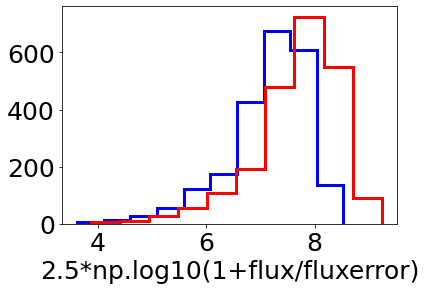

In [34]:
plt.hist(2.5*np.log10(1+gaiaedr3['phot_bp_mean_flux_over_error'][gaia_ind]),histtype='step',lw=3.0,color='blue')
plt.hist(2.5*np.log10(1+gaiaedr3['phot_rp_mean_flux_over_error'][gaia_ind]),histtype='step',lw=3.0,color='red')
plt.xlabel(r'2.5*np.log10(1+flux/fluxerror)')

Text(0.5, 0, '2.5/np.log(10)/fluxerror/flux')

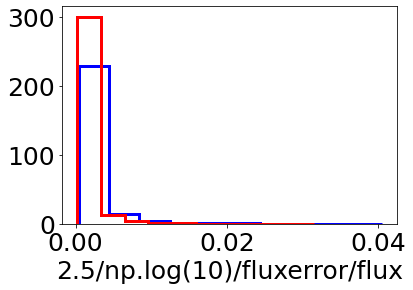

In [49]:
plt.hist((2.5*0.434)/gaiaedr3['phot_bp_mean_flux_over_error'][gaia_ind],
         histtype='step',lw=3.0,color='blue',density=True)
plt.hist((2.5*0.434)/gaiaedr3['phot_rp_mean_flux_over_error'][gaia_ind],
         histtype='step',lw=3.0,color='red',density=True)
plt.xlabel(r'2.5/np.log(10)/fluxerror/flux')

2.5log(Flux) -> 2.5*log10(1/(1+fluxerr/flux))

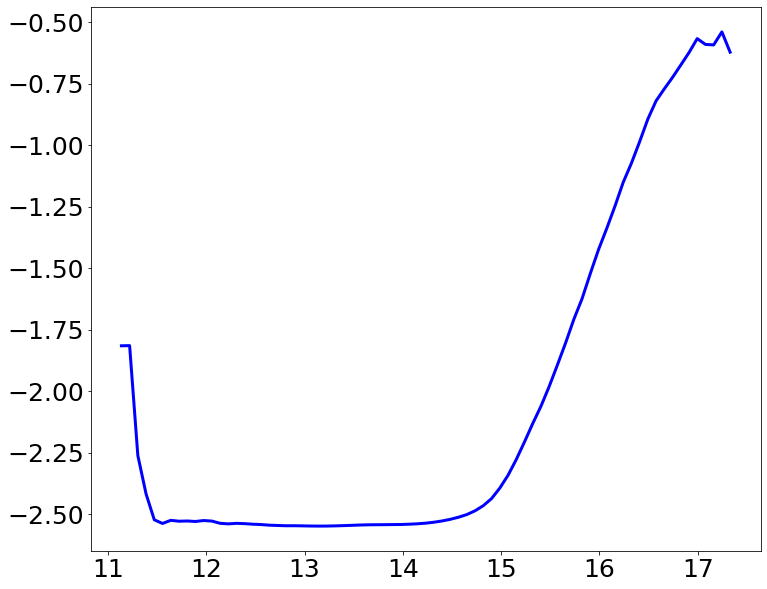

In [65]:
### BP
# bp_fin = np.where(np.isfinite(gaiaedr3['phot_bp_mean_mag'])==True)

bpmin = min(gaiaedr3['phot_bp_mean_mag'][gaia_ind])
bpmax = max(gaiaedr3['phot_bp_mean_mag'][gaia_ind])

bpdiff = bpmax-bpmin
bpfluxerr3 = 2.5*np.log10((1+gaiaedr3['phot_bp_mean_flux_over_error'][bp_fin]**-1)**-1)
bpmagerr3 = np.sqrt((bpfluxerr3)**2+0.0027901700**2)

binnum = 75
bpbin3 ,_,_ = binned_statistic(gaiaedr3['phot_bp_mean_mag'][bp_fin],np.log10(bpmagerr3),'median',bins=binnum)

plt.figure(figsize=[12,10])

plt.plot(np.arange(bpmin,bpmax,bpdiff/binnum),bpbin3,lw=3.0,c='blue')
# plt.ylim(bottom=0.)